In [29]:
!pip install xlrd

## Q). Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

# Hierarchical Clustering for "Crime Data"

In [34]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [35]:
crime=pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/7 Clustering/crime_data.csv')
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [36]:
# Normalization  function
def norm_func(i):
    x = (i-i.min())/(i.max())-(i.min())
    return(x)

In [37]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,-0.087356,-44.433234,-31.714286,-6.997826
1,-0.271264,-44.353116,-31.824176,-6.491304
2,-0.380460,-44.261128,-31.472527,-6.784783
3,-0.340230,-44.569733,-31.802198,-7.034783
4,-0.328736,-44.314540,-31.351648,-6.576087
5,-0.391954,-44.528190,-31.494505,-6.617391
6,-0.656322,-44.807122,-31.505495,-7.217391
7,-0.506897,-44.427300,-31.560440,-7.115217
8,0.039080,-44.139466,-31.472527,-6.765217
9,0.154023,-44.507418,-31.692308,-6.897826


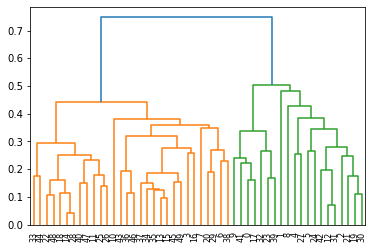

In [67]:
# create dendrogram
dendrogram= sch.dendrogram(sch.linkage(df_norm,method='average'))

In [68]:
# Create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity='manhattan',linkage ='average')
hc

AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=4)

In [69]:
# Save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [70]:
crime['h_clusterid'] = hc.labels_

In [71]:
crime

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


END




## K-Means clustering for 'Crime Data'

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [44]:
crime1=pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/7 Clustering/crime_data.csv')
crime1.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [45]:
# Normalization function
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime1 = scaler.fit_transform(crime1.iloc[:,1:])

In [46]:
# How to find the optimum number of cluster
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-square criteria

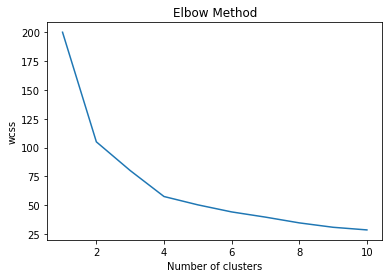

In [47]:
# Finding best cluster value using elbow chart
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_crime1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [48]:
# Build cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime1)

KMeans(n_clusters=4, random_state=42)

In [49]:
clusters_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [50]:
# Assign cluster to the dataset
crime1['clusterid_new']= clusters_new.labels_

In [51]:
crime1.head()

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


In [52]:
# These are standard values.
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [53]:
crime1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


In [54]:
crime1

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


END

## DBSCAN for "Crime data"

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
crime3=pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/7 Clustering/crime_data.csv')
crime3.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [57]:
print(crime3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [58]:
# Dropping columns
crime3.drop(['States'],axis=1, inplace=True)

In [59]:
# Converting data into array
array1 = crime3.values
array1

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [60]:
# Standardizing the data
st_scaler1 = StandardScaler().fit(array)
X = st_scaler1.transform(array)

NameError: name 'array' is not defined

In [ ]:
X

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X)

In [ ]:
dbscan.labels_

In [ ]:
cl1 = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl1

In [ ]:
pd.concat([crime3,cl1],axis=1)

END

## Q). Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

#  Hierarchical Clustering for Airline Data

In [ ]:
# Import Hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
airline = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/7 Clustering/EastWestAirlines.csv')
airline.head()

In [ ]:
# Normalization function
def norm_func(i):
    x= (i-i.min())/(i.max())-(i.min())
    return(x)

In [ ]:
# Normaliztion data frame (considering the numerical part of data)
df_norm1 = norm_func(airline.iloc[:,1:])
df_norm1

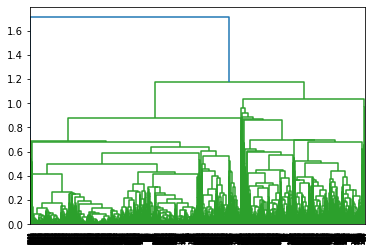

In [61]:
# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm1, method= 'average'))

In [62]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'manhattan', linkage = 'average')

In [63]:
# Save cluster for chart
y_hc= hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [64]:
airline['h_clusterid'] = Clusters

In [65]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,NaN


In [66]:
Clusters

,Clusters
0,2
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,2


END

## K-Means clustering for "Airline data"

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
airline1 = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/7 Clustering/EastWestAirlines.csv')
airline1.head()

In [ ]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_airline1 = scaler.fit_transform(airline1.iloc[:,1:])

In [ ]:
# How to find the optimum number of cluster
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-square criteria

In [ ]:
# finding best cluster value using elbow chart
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_airline1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#building cluster algorithm
from sklearn.cluster import KMeans
cluster_new = KMeans(2, random_state=42)
cluster_new.fit(scaled_airline1)

In [ ]:
clusters_new.labels_

In [ ]:
# Assign cluster to the dataset
airline1['clusterid_new'] = cluster_new.labels_

In [ ]:
airline1

In [ ]:
# These are standard values.
clusters_new.cluster_centers_

In [ ]:
airline1.groupby('clusterid_new').agg(['mean']).reset_index()

In [ ]:
airline1

END

## DBSCAN for "Airline Data"

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
airline2 = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/7 Clustering/EastWestAirlines.csv')
airline2.head()

In [ ]:
print(airline2.info())

In [ ]:
# Dropping Columns
airline2.drop(['ID#','Award?'],axis=1, inplace=True)

In [ ]:
array = airline2.values
array

In [ ]:
# Standardizing the data
st_scaler= StandardScaler().fit(array)
X = st_scaler.transform(array)

In [ ]:
X

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

In [ ]:
dbscan.labels_

In [ ]:
cl= pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

In [ ]:
pd.concat([airline2, cl],axis=1)

END